## Baseline checks

Just checking everything works as it should

In [55]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

### Visualize dataset

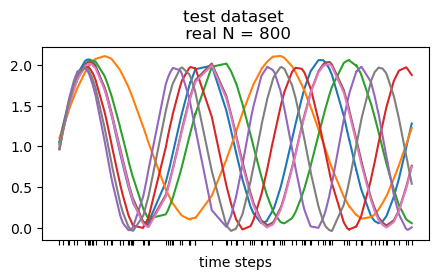

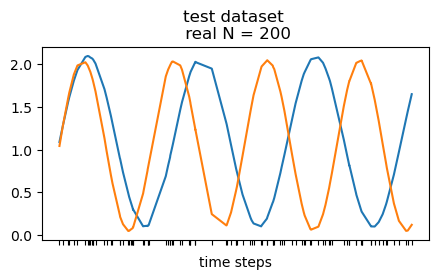

In [56]:

# read in the periodic dataset file 
test_dataset_filename = "../data/periodic/periodic_test.pt"
train_dataset_filename = "../data/periodic/periodic_train.pt"
time_steps_filename = "../data/periodic/periodic_time_steps.pt"
# read in the time steps
time_steps = torch.load(time_steps_filename, weights_only=True)
# read in the pt file
test_dataset = torch.load(test_dataset_filename, weights_only=True)
train_dataset = torch.load(train_dataset_filename,  weights_only=True)

# extract the first 2 from the test dataset
# get total number of time steps
n_samples = train_dataset.shape[0]
n_plot = 8
train_dataset_plot = train_dataset[0:n_plot]
train_dataset_plot.shape
# plot time steps on x and the test dataset on y
plt.figure(figsize=(5, 2.5))
for i in range(n_plot):
    plt.plot(time_steps, train_dataset_plot[i], label='Training Dataset {}'.format(i))
# draw a grey vertical line at each time step
# for t in time_steps:
#     plt.axvline(x=t, color='gray', linewidth=0.3)
#     # draw x tick marks at each time step inside the plot
plt.xticks(time_steps, rotation=45)
# remove labels on x axis
plt.xticks(ticks=time_steps, labels=['']*len(time_steps))


# draw tick marks on x axis only where there is a time step
plt.xlabel('time steps')
plt.title('test dataset \n real N = {}'.format(n_samples))
# put the legend outside the plot
plt.show()

# extract the first 2 from the test dataset
n_plot = 2
test_dataset_plot = test_dataset[0:n_plot]
test_dataset_plot.shape
n_samples = test_dataset.shape[0]
# plot time steps on x and the test dataset on y
plt.figure(figsize=(5, 2.5))
for i in range(n_plot):
    plt.plot(time_steps, test_dataset_plot[i], label='Test Dataset {}'.format(i))
# draw a grey vertical line at each time step
# for t in time_steps:
#     plt.axvline(x=t, color='gray', linewidth=0.3)
#     # draw x tick marks at each time step inside the plot
plt.xticks(time_steps, rotation=45)
# remove labels on x axis
plt.xticks(ticks=time_steps, labels=['']*len(time_steps))
plt.xlabel('time steps')
plt.title('test dataset \n real N = {}'.format(n_samples))
# put the legend outside the plot
plt.show()


### Check centralized training

In [57]:
centralized_training_loss = "../results/periodic/centralized_training/100_epochs/loss_per_epoch.csv"

In [58]:
# read in the csv file
# df_centralized_training_loss = pd.read_csv(centralized_training_loss)
# #plot the training loss
# plt.figure(figsize=(5, 2.5))
# plt.plot(df_centralized_training_loss['epoch'], df_centralized_training_loss['loss'], label='Centralized Training Loss', color='blue')
# plt.ylim(bottom=0)
# # x axis is discrete
# plt.xticks(df_centralized_training_loss['epoch'])
# # plot only every 50th epoch
# max_epoch = df_centralized_training_loss['epoch'].max()
# plt.xticks(np.arange(0, max_epoch, 25))
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Centralized Training Loss')


# plt.figure(figsize=(5, 2.5))
# plt.plot(df_centralized_training_loss['epoch'], df_centralized_training_loss['mse'], label='Centralized Training Loss', color='blue')
# plt.ylim(bottom=0)
# # x axis is discrete
# plt.xticks(df_centralized_training_loss['epoch'])
# plt.xticks(np.arange(0, max_epoch, 25))
# plt.xlabel('Epoch')
# plt.ylabel('MSE')
# plt.title('Centralized Training MSE')





## Plot client side

In [59]:
subfolder = "15_rounds"

In [60]:
cn = 0

def plot_client_loss(cn):

    # Load JSON file
    with open(f"../results/periodic/federated_training/{subfolder}/federated_outputs/results_{cn}.json", "r") as f:
        data = json.load(f)


    # Extract loss values, rounds, and epochs
    loss_values = []
    rounds = []
    epochs = []

    epoch_count = 0  # To keep track of epochs

    for entry in data["client_train"]:
        round_number = entry["round"]
        for loss in entry["loss"]:
            rounds.append(round_number)
            loss_values.append(loss)
            epochs.append(epoch_count)
            epoch_count += 1

    # make it smaller 
    plt.figure(figsize=(10, 2.5))
    # Plot loss values sequentially across rounds and epochs
    plt.plot(epochs, loss_values, marker='o', label="Loss across epochs")


    # Add vertical lines for each round number
    for round_number in set(rounds):
        round_epochs = [i for i, r in enumerate(rounds) if r == round_number]
        if round_epochs:
            # Place a vertical line at the first epoch of each round
            # if it is not the first round
            if round_number != 0:
                plt.axvline(x=round_epochs[0], color='grey', linestyle='--', label=f"Round {round_number}")

    # Customize x-axis ticks to represent rounds
    xticks = [i for i, round_number in enumerate(rounds) if i == 0 or rounds[i] != rounds[i-1]]
    plt.xticks(xticks, [rounds[i] for i in xticks])
    # log scale y 
    plt.yscale('log')
    plt.ylim(bottom=0)
    plt.xlabel("Round")
    plt.ylabel("Local Loss")
    plt.title(f"Client {cn}")
    plt.tight_layout()
    plt.show()

In [61]:
with open(f"../results/periodic/federated_training/100_epochs/federated_outputs/results_{cn}.json", "r") as f:
    data = json.load(f)

data

{'client_train': [{'loss': [4752.14599609375,
    4462.84228515625,
    3308.64111328125],
   'round': 0}]}

/var/folders/yx/rfhrpk093hz1gfwtn7qxt_180000gq/T/ipykernel_24790/34982749.py:45: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


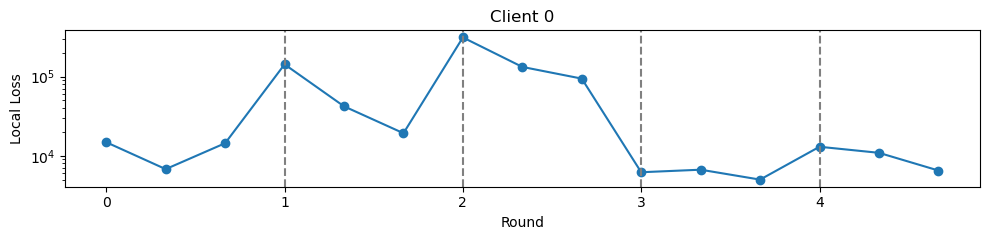

/var/folders/yx/rfhrpk093hz1gfwtn7qxt_180000gq/T/ipykernel_24790/34982749.py:45: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


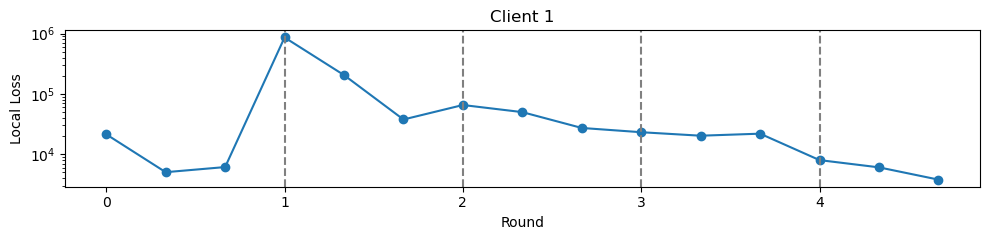

In [62]:
plot_client_loss(0)
plot_client_loss(1)

In [63]:
df_centralized_evaluate

,round,centralized_loss,centralized_accuracy
0,0,1266.023438,0.256389
1,1,865.743373,0.184343
2,2,3368.020926,0.751865
3,3,637.766392,0.136101
4,4,580.480190,0.120611
5,5,912.557617,0.250301
6,6,1817.594308,0.490008
7,7,449.576695,0.096559
8,8,849.356166,0.184094
9,9,463.648821,0.100040


([<matplotlib.axis.XTick at 0x30b47fd70>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

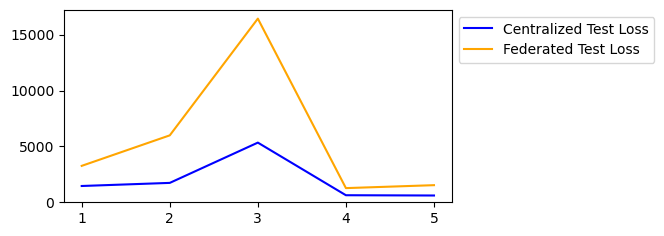

In [64]:
# Now load the federated learning loss
federated_training_loss = f"../results/periodic/federated_training/{subfolder}/federated_outputs/results.json"
with open(federated_training_loss, 'r') as f:
    data = json.load(f)

# Plot centralized evaluate
df_centralized_evaluate = pd.DataFrame(data['centralized_evaluate'])
df_federated_evaluate = pd.DataFrame(data['federated_evaluate'])

# Join the two dataframes on the round
df_centralized_evaluate['round'] = df_centralized_evaluate['round'].astype(int)
df_federated_evaluate['round'] = df_federated_evaluate['round'].astype(int)

# join the two dataframes on the round
df = pd.merge(df_centralized_evaluate, df_federated_evaluate, on='round')
# now plot the data
plt.figure(figsize=(5, 2.5))
plt.plot(df['round'], df['centralized_loss'], label='Centralized Test Loss', color='blue')
plt.plot(df['round'], df['federated_evaluate_loss'], label='Federated Test Loss', color='orange')
# log scale

# add legend on the outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(bottom=0)
# x axis is discrete
plt.xticks(df['round'])

In [65]:
data

{'centralized_evaluate': [{'round': 0,
   'centralized_loss': 1122.8399135044642,
   'centralized_accuracy': 0.2381728036063058},
  {'round': 1,
   'centralized_loss': 1458.000279017857,
   'centralized_accuracy': 0.2958862440926688},
  {'round': 2,
   'centralized_loss': 1735.8849051339287,
   'centralized_accuracy': 0.4091798577989851},
  {'round': 3,
   'centralized_loss': 5341.57421875,
   'centralized_accuracy': 2.223065512520926},
  {'round': 4,
   'centralized_loss': 631.1056082589286,
   'centralized_accuracy': 0.14112121718270437},
  {'round': 5,
   'centralized_loss': 606.8023158482143,
   'centralized_accuracy': 0.15055053574698313}],
 'federated_evaluate': [{'round': 1,
   'federated_evaluate_loss': 3260.833984375,
   'federated_evaluate_accuracy': 0.6637728810310364},
  {'round': 2,
   'federated_evaluate_loss': 5992.021647135417,
   'federated_evaluate_accuracy': 1.4824747244517007},
  {'round': 3,
   'federated_evaluate_loss': 16443.177734375,
   'federated_evaluate_accu

In [66]:
df

,round,centralized_loss,centralized_accuracy,federated_evaluate_loss,federated_evaluate_accuracy
0,1,1458.000279,0.295886,3260.833984,0.663773
1,2,1735.884905,0.409180,5992.021647,1.482475
2,3,5341.574219,2.223066,16443.177734,5.624927
3,4,631.105608,0.141121,1268.434814,0.258988
4,5,606.802316,0.150551,1531.544840,0.336834


Text(0.5, 1.0, 'Test MSE')

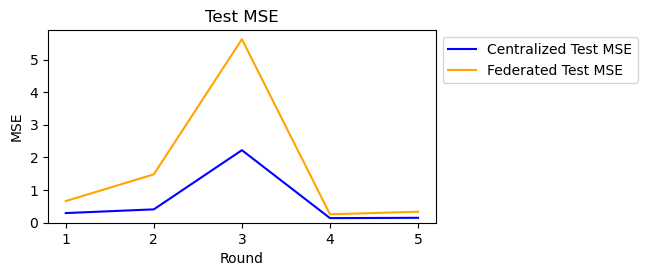

In [67]:
# same as above with mse
plt.figure(figsize=(5, 2.5))
plt.plot(df['round'], df['centralized_accuracy'], label='Centralized Test MSE', color='blue')
plt.plot(df['round'], df['federated_evaluate_accuracy'], label='Federated Test MSE', color='orange')
# add legend on the outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(bottom=0)
# x axis is discrete
plt.xticks(df['round'])
# add x and y labels
plt.xlabel('Round')
plt.ylabel('MSE')
plt.title('Test MSE')

## Use the produced model to plot the output